# Clustering drills

Welcome, traveller, you have arrived in the drills section of the clustering chapter. Here, you can practice some clustering techniques.

If you have not checked out the [example](./1.clustering_with_sklearn.ipynb), I advise you do so. We will use the same [pokemon](./assets/pokemon.csv) dataset to further our journey.

## 1. Multi-dimensional data

in the example, we wanted to determine the **most physically diverse** [pokemon](./assets/pokemon.csv) team there is. To do so, we clustered the pokemon into groups according to their **weight** and **height** using **k-means**.

Is this really the most diverse team out there though? The pokemon selected there are still similar in terms of **combat abilities**, and we have this data available.

For the first drill, I want you to:
   - cluster the pokemon into 6 groups according to similar:
       - height
       - weight
       - hp
       - attack
       - defense
       - speed
   - visualise these multidimensional clusters using a scatter plot matrix
   - determine the most dissimilar pokemon team from these clusters
   
So that you have **6-dimensional** clusters containing **diverse** pokemon groups from which you can determine your pokemon team similar to the method described in the example.

In [1]:
# cluster your pokemon here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pokemon = pd.read_csv("./assets/pokemon.csv")
pokemon.head().T

,0,1,2,3,4
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']"
against_bug,1,1,1,0.5,0.5
against_dark,1,1,1,1,1
against_dragon,1,1,1,1,1
against_electric,0.5,0.5,0.5,1,1
against_fairy,0.5,0.5,0.5,0.5,0.5
against_fight,0.5,0.5,0.5,1,1
against_fire,2,2,2,0.5,0.5
against_flying,2,2,2,1,1
against_ghost,1,1,1,1,1


In [3]:
# drop rows containing null values for weight or height
pokemon = pokemon.dropna(axis=0, subset=['weight_kg'])
pokemon = pokemon.dropna(axis=0, subset=['height_m'])

# adjusting index
pokemon = pokemon.reset_index(drop=True)

In [4]:
from sklearn.cluster import KMeans

# number of pokemon clusters
team_size = 6

# make new dataframe with relevant metrics
pokemon_metrics = pokemon[['weight_kg','height_m','speed','hp','defense','attack']]


# # z-score standardization
pokemon_metrics_standardized=(pokemon_metrics-pokemon_metrics.mean())/pokemon_metrics.std()
pokemon_metrics_standardized = pokemon_metrics_standardized.rename(columns={'weight_kg': 'weight_zscore',
                                                                        'height_m':'height_zscore',
                                                                           'speed':'speed_zscore',
                                                                           'hp':'hp_zscore',
                                                                           'defense':'defense_zscore',
                                                                           'attack':'attack_zscore'})

# # fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(pokemon_metrics_standardized)

# # clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# # add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
pokemon_metrics_standardized = pokemon_metrics_standardized.join(cluster_labels.to_frame())
pokemon_metrics_standardized.head()

,weight_zscore,height_zscore,speed_zscore,hp_zscore,defense_zscore,attack_zscore,cluster
0,-0.498178,-0.429400,-0.736195,-0.907100,-0.779152,-0.890461,3
1,-0.442396,-0.151706,-0.217239,-0.343650,-0.324695,-0.487032,3
2,0.353180,0.773940,0.474702,0.407618,1.622977,0.692223,0
3,-0.483546,-0.521965,-0.044254,-1.132480,-0.973919,-0.797362,3
4,-0.387529,-0.059142,0.474702,-0.418776,-0.487001,-0.424966,3


In [5]:
# visualise your clusters here (take a look at the pandas scatter_matrix or seaborn's pairplot method)

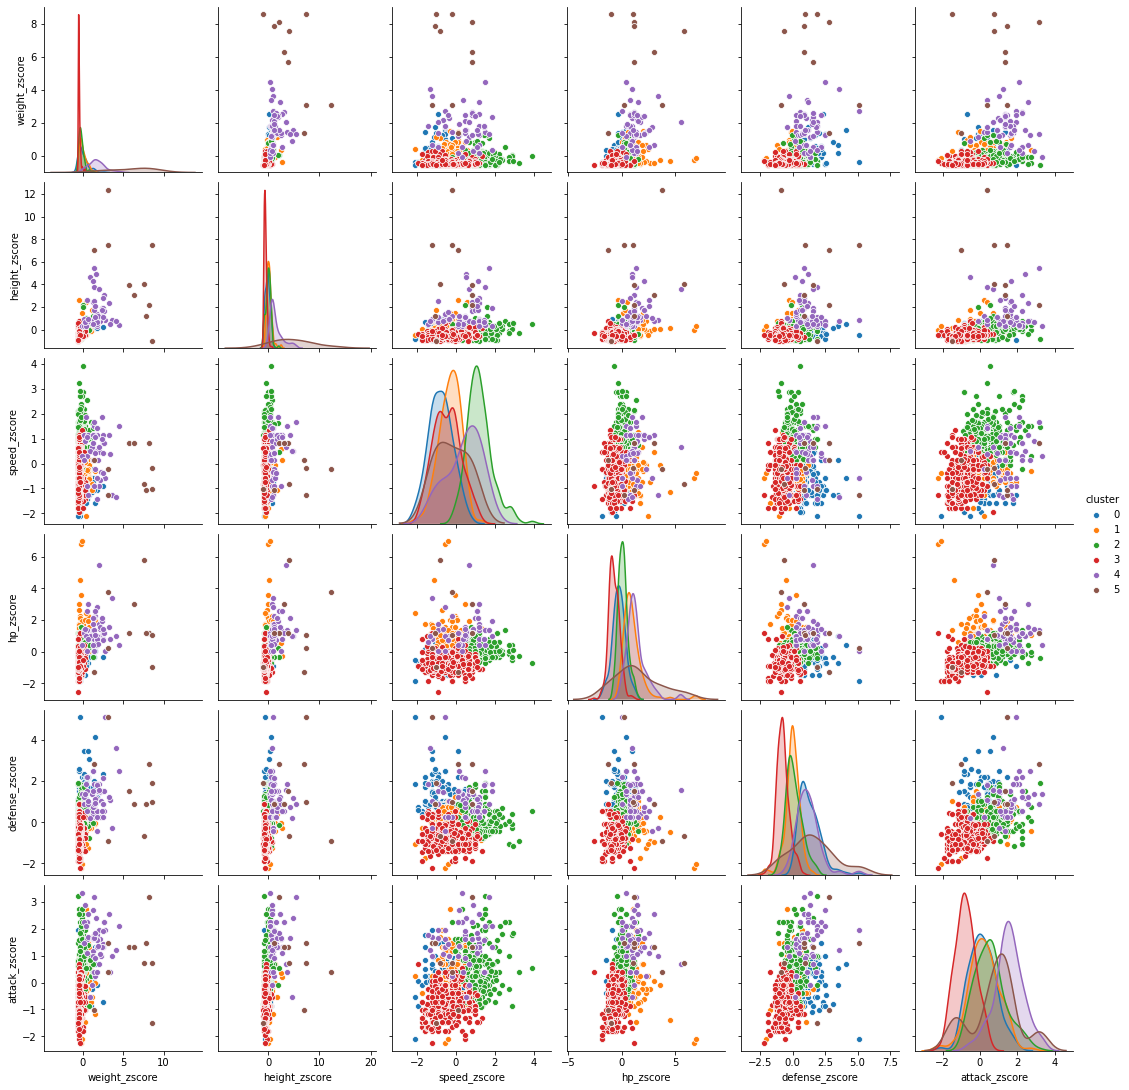

In [6]:
sns.pairplot(pokemon_metrics_standardized, hue='cluster')
plt.show()

In [7]:
# determine your final pokemon here

In [8]:
import numpy as np        
        
def distance_to_other_clusters(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'], single_pokemon['speed_zscore'],
                       single_pokemon['hp_zscore'], single_pokemon['defense_zscore'], single_pokemon['attack_zscore']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [9]:
chosen_pokemon

,weight_zscore,height_zscore,speed_zscore,hp_zscore,defense_zscore,attack_zscore,cluster,dissimilarity,name
194,-0.373812,-0.521965,-2.120077,-1.846184,5.096325,-2.100749,0,37.452517,Shuckle
94,-0.244874,-0.059142,-0.563210,6.793391,-2.207445,-2.255914,1,42.453303,Chansey
367,-0.005287,0.496246,3.934406,-0.719283,0.551757,0.537058,2,27.913528,Deoxys
330,-0.493605,-0.521965,0.474702,-1.846184,-1.720527,-1.945584,3,28.612209,Feebas
699,2.041264,3.550879,0.647687,5.516236,1.558054,0.692223,4,34.653162,Zygarde
302,3.078255,12.344519,-0.217239,3.788321,-0.908997,0.381893,5,65.303484,Wailord


## 2. Similarity criteria

Very nice! What a unique team!

You probably used the same **similarity criteria** as the introduction example. **k-means** uses Euclidean distance as a similarity criteria, so it makes sense that we also use Euclidean distance for our **dissimilarity criteria**, but what would happen if we picked something else?

"Woah, you're going too fast, 'Euclidean distance'? What do you mean by that?"

This is distance as we know it in the **real world**, a line connecting two points. But distance does not have to be defined this way in our **problem space**, it can be **Manhattan distance**, or **squared distance**, or something else entirely.

<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-10-8818-6_7/MediaObjects/463464_1_En_7_Fig2_HTML.jpg" align="center" width="600"/>

Replacing this similarity criteria for the `sklearn` k-means is no trivial task, so I will not ask this of you, but changing it for our **dissimilarity criteria** should be doable.

For the next exercise, I would like you to:
- replace the dissimilarity criteria from the example by:
    - manhattan distance
    - squared distance
    - 1/(squared distance)

In [10]:
# Assign dissimilarity to your pokemon here

In [11]:
def distance_to_other_clusters(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'], single_pokemon['speed_zscore'],
                       single_pokemon['hp_zscore'], single_pokemon['defense_zscore'], single_pokemon['attack_zscore']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += sum(abs(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [12]:
chosen_pokemon.T[::-1].head()

,194,94,777,330,699,302
name,Shuckle,Chansey,Kartana,Feebas,Zygarde,Wailord
dissimilarity,78.0396,79.2172,54.6382,61.5542,67.4534,104.263
cluster,0,1,2,3,4,5
attack_zscore,-2.10075,-2.25591,3.2059,-1.94558,0.692223,0.381893
defense_zscore,5.09633,-2.20744,1.88267,-1.72053,1.55805,-0.908997


Did your team change? Why do you think it did(n't)? Discuss this with one of your colleagues!

## 3. Heterogenous data

There! We did it! The most **diverse pokémon team** possible...or is it?

We have clustered our pokémon according to **weight** and **height** in the example, and according to **combat abilities** in the first drill, but what about **pokémon type**?

Some of the chosen pokémon may have the same type, as this data was ignored during clustering. But to get a really diverse team, we should take these into account!

For this drill I want you to:
- cluster the pokémon into 6 groups according to similar:
    - weight
    - height
    - primary pokémon type
    - secondary pokémon type
- determine the most dissimilar pokemon team from these clusters

But wait, these pokémon types, they're in **text format**, how do you compare these to the **numerical data**? It's time to **vectorize** this data. **Vectorizing** this textual data means representing this data in a way that can be understood by machine learning algorithms. 

For example, let's say there are only 3 pokémon types, and pokémon can only have one type. Vectorising a **grass**, **fire**, and **water** pokémon would look like this:
- grass -> [1, 0, 0]
- fire  -> [0, 1, 0]
- water -> [0, 0, 1]

So in this case, **3-dimensional** data. In our case though, we have a weight dimension, a height dimension, 18 primary and secondary dimensions, so a whopping **38 dimensions**

In [13]:
# vectorize your pokémon type data here (there are modules that vectorize data)

In [14]:
dummies_type1 = pd.get_dummies(pokemon['type1'], prefix='type1')
dummies_type2 = pd.get_dummies(pokemon['type2'], prefix='type2')

pokemon = pd.concat([pokemon, dummies_type1, dummies_type2], axis=1)

In [15]:
# number of pokemon clusters
team_size = 6

In [16]:
# make new dataframe with relevant metrics
pokemon_metrics = pokemon[['weight_kg','height_m']]

# # z-score standardization
pokemon_metrics_standardized=(pokemon_metrics-pokemon_metrics.mean())/pokemon_metrics.std()
pokemon_metrics_standardized = pokemon_metrics_standardized.rename(columns={'weight_kg': 'weight_zscore',
                                                                        'height_m':'height_zscore'})


pokemon_types = pokemon.iloc[:, 41:]
pokemon_metrics_standardized = pd.concat([pokemon_metrics_standardized, pokemon_types], axis=1)
pokemon_metrics_standardized.head()

,weight_zscore,height_zscore,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,...,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
0,-0.498178,-0.429400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.442396,-0.151706,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.353180,0.773940,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.483546,-0.521965,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.387529,-0.059142,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# cluster your multi-dimensional pokémon data here

In [18]:
# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(pokemon_metrics_standardized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
pokemon_metrics_standardized = pokemon_metrics_standardized.join(cluster_labels.to_frame())

In [19]:
# determine your unique team here

In [20]:
def distance_to_other_clusters(single_pokemon):
    metric = np.array(single_pokemon.iloc[0:-1])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

chosen_pokemon.T[::-1]

,129,302,776,357,576,730
name,Dragonair,Wailord,Celesteela,Metagross,Joltik,Dewpider
dissimilarity,21.4847,60.4775,51.3886,25.393,24.0897,23.0978
cluster,0,1,2,3,4,5
type2_water,0,0,0,0,0,0
type2_steel,0,0,0,0,0,0
type2_rock,0,0,0,0,0,0
type2_psychic,0,0,0,1,0,0
type2_poison,0,0,0,0,0,0
type2_normal,0,0,0,0,0,0
type2_ice,0,0,0,0,0,0


But wait, did you properly **normalize/standardize** your data? If you simply vectorize your data like in the example shown above, you might not get the results you want (try this for yourselves, what do you notice?).

The example standardizes its data using the **z-score**. What does this mean? z-score or mean standardization means we are using our **problem space** where our data lives optimally. 

in the case of the pokemon weight and height, it was clear to see the **order of magnitude** of the weight is larger than that of the height. During clustering, this would mean that **weight similarity would matter more than height similarity**, since the euclidian distance between points of data would be larger.

For example, A pokemon weighing 200kg and measuring 4m is about **as similar** as another pokémon weighing 100kg and measuring 2m in terms of both weight and height. But the euclidian difference in between the weight difference is 100(kg), while the difference of height is only 2(m). That is where normalization/standardization comes in handy. It scales these metrics so they can be compared fairly.

Which is why when we vectorize out **pokémon types** into vectors of length one, the **euclidian distance** between one pokémon type and the other is about 1.4 (thanks Pythagoras), which isn't that much compared to the weight and height difference.

Show me how you would **make sure** that **similarity or dissimilarity** of the **pokémon type** matters more than **weight or height**?

In [21]:
# standardize and scale your data in such a way that pokémon type similarity matters more than the other metrics

In [22]:
pokemon_metrics = pokemon[['weight_kg','height_m']]

# # z-score standardization
pokemon_metrics_standardized=(pokemon_metrics-pokemon_metrics.mean())/pokemon_metrics.std()
pokemon_metrics_standardized = pokemon_metrics_standardized.rename(columns={'weight_kg': 'weight_zscore',
                                                                        'height_m':'height_zscore'})


pokemon_types = pokemon.iloc[:, 41:] * 10
pokemon_metrics_standardized = pd.concat([pokemon_metrics_standardized, pokemon_types], axis=1)

In [23]:
# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(pokemon_metrics_standardized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
pokemon_metrics_standardized = pokemon_metrics_standardized.join(cluster_labels.to_frame())

In [24]:
def distance_to_other_clusters(single_pokemon):
    metric = np.array(single_pokemon.iloc[0:-1])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

chosen_pokemon.T[::-1].head()

,302,759,441,576,466,776
name,Wailord,Drampa,Abomasnow,Joltik,Heatran,Celesteela
dissimilarity,93.6042,84.5497,84.359,84.3555,85.387,101.235
cluster,0,1,2,3,4,5
type2_water,0,0,0,0,0,0
type2_steel,0,0,0,0,10,0


## 4. Cluster method comparison

I hope you're getting a bit more comfortable with the **k-means** method, it sure is a popular one, but it's [not the only clustering technique](https://scikit-learn.org/stable/modules/clustering.html) out there!

For this excercise, I want you to:
- pick 3 clustering techniques from the `scikit-learn` library
- cluster the pokémon according weight and height
- try to adjust the cluster method arguments so 6 clusters are obtained after clustering
- evaluate in-cluster similarity and cluster-to-cluster similarity:
  - compare every pokémon in a cluster to every other pokémon within that same cluster (choose your own similarity criteria)
  - take the average of these in-cluster similarities
  - do this for every cluster
  - take the the average or centroid of ever cluster, and determine the similarity to every other cluster
  - compare these two metrics (in-cluster similarity and cluster-to-cluster similarity) for every chosen clustering technique
  - determine the 'best' technique by maximising in-cluster similarity and minimizing cluster-to-cluster similarity
- visualize the results

Bonus: track these metrics for every iteration of the algorithms and plot the progression from start to finish

In [25]:
# compare your techniques here

In [26]:
df = pd.read_csv('./assets/pokemon.csv')
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']","['Torrent', 'Rain Dish']","['Torrent', 'Rain Dish']","['Torrent', 'Rain Dish']","['Shield Dust', 'Run Away']",...,['Shadow Shield'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Prism Armor'],['Soul-Heart']
against_bug,1,1,1,0.5,0.5,0.25,1,1,1,1,...,1,0.5,0.5,0.5,1,0.25,1,2,2,0.25
against_dark,1,1,1,1,1,1,1,1,1,1,...,4,1,0.5,0.5,1,1,1,0.5,2,0.5
against_dragon,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.5,0.5,2,1,0
against_electric,0.5,0.5,0.5,1,1,2,2,2,2,1,...,1,1,1,1,0.5,2,0.5,0.5,1,1


In [27]:
# drop rows containing null values for weight or height
pokemon = pokemon.dropna(axis=0, subset=['weight_kg'])
pokemon = pokemon.dropna(axis=0, subset=['height_m'])

# adjusting index
pokemon = pokemon.reset_index(drop=True)

### Affininty Propagation

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation

# make new dataframe with relevant metrics
pokemon_metrics = pokemon[['weight_kg','height_m']]

# # z-score standardization
pokemon_metrics_standardized=(pokemon_metrics-pokemon_metrics.mean())/pokemon_metrics.std()
pokemon_metrics_standardized = pokemon_metrics_standardized.rename(columns={'weight_kg': 'weight_zscore',
                                                                        'height_m':'height_zscore'})

# # fit a kmeans object to the dataset
Affinity_prop = AffinityPropagation(random_state=42).fit(pokemon_metrics_standardized)

# # clusters is an attribute of the object
cluster_centers = Affinity_prop.cluster_centers_

# # add cluster index to dataframe
cluster_labels = pd.Series(Affinity_prop.labels_, name='cluster')
pokemon_metrics_standardized = pokemon_metrics_standardized.join(cluster_labels.to_frame())
pokemon_metrics_standardized.head()

/home/kustex/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:243: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


,weight_zscore,height_zscore,cluster
0,-0.498178,-0.429400,-1
1,-0.442396,-0.151706,-1
2,0.353180,0.773940,-1
3,-0.483546,-0.521965,-1
4,-0.387529,-0.059142,-1


### Spectral Clustering

In [29]:
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
np.set_printoptions(formatter={'float_kind':float_formatter})

from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

# drop rows containing null values for weight or height
pokemon = pokemon.dropna(axis=0, subset=['weight_kg'])
pokemon = pokemon.dropna(axis=0, subset=['height_m'])

# adjusting index
pokemon = pokemon.reset_index(drop=True)
pokemon

/home/kustex/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,0,0,0,0,1,0,0,0,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,0,0,0,0,1,0,0,0,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,0,0,0,0,0,0,0,0,0,0
777,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
778,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,0,0,0,0,0,0,0,0,0,0
779,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Height')

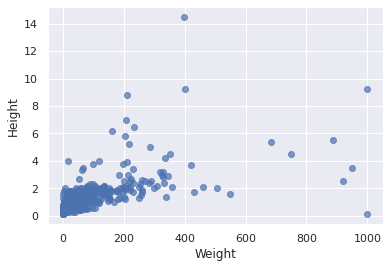

In [30]:
# number of pokemon clusters
team_size = 6

# make new dataframe with relevant metrics
pokemon_metrics = pokemon[['weight_kg','height_m']]
                     
plt.scatter(pokemon_metrics['weight_kg'], pokemon_metrics['height_m'], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')

In [31]:
W = pairwise_distances(pokemon_metrics, metric='euclidean')
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
print(W)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [32]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

[[0 1 1 0 0 0 0 1 0 0]
 [1 0 0 0 1 1 0 1 1 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 1]
 [0 1 0 0 0 1 1 1 1 0]
 [0 1 0 1 1 0 1 1 1 0]
 [0 0 0 1 1 1 0 1 0 0]
 [1 1 0 1 1 1 1 0 1 1]
 [0 1 0 0 1 1 0 1 0 1]
 [0 1 0 1 0 0 0 1 1 0]]


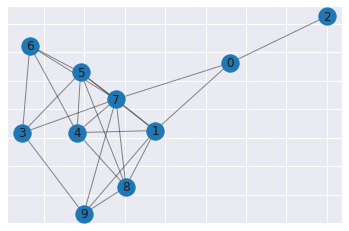

In [33]:
G = nx.random_graphs.erdos_renyi_graph(10, 0.5)

draw_graph(G)

W = nx.adjacency_matrix(G)
print(W.todense())

In [34]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)

# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[3 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 4]]
laplacian matrix:
[[ 3 -1 -1  0  0  0  0 -1  0  0]
 [-1  6  0  0 -1 -1  0 -1 -1 -1]
 [-1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  4  0 -1 -1 -1  0 -1]
 [ 0 -1  0  0  5 -1 -1 -1 -1  0]
 [ 0 -1  0 -1 -1  6 -1 -1 -1  0]
 [ 0  0  0 -1 -1 -1  4 -1  0  0]
 [-1 -1  0 -1 -1 -1 -1  8 -1 -1]
 [ 0 -1  0  0 -1 -1  0 -1  5 -1]
 [ 0 -1  0 -1  0  0  0 -1 -1  4]]


In [35]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[0.000 0.663 9.019 2.983 3.456 3.704 7.612 6.767 6.317 5.479]
eigenvectors:
[[0.316 0.290 -0.141 0.648 0.415 -0.394 -0.138 0.157 0.065 0.021]
 [0.316 -0.080 -0.107 0.283 -0.051 0.159 0.631 -0.576 -0.207 -0.050]
 [0.316 0.861 0.018 -0.327 -0.169 0.146 0.021 -0.027 -0.012 -0.005]
 [0.316 -0.177 -0.116 -0.366 -0.113 -0.595 0.214 0.203 -0.112 -0.505]
 [0.316 -0.154 -0.119 -0.029 0.213 0.460 -0.109 0.425 -0.641 -0.023]
 [0.316 -0.158 -0.120 -0.113 0.121 0.140 -0.636 -0.525 0.134 -0.340]
 [0.316 -0.177 -0.116 -0.446 0.462 -0.076 0.151 -0.041 0.265 0.585]
 [0.316 -0.103 0.940 0.054 0.030 -0.028 -0.015 0.012 0.005 0.001]
 [0.316 -0.149 -0.118 0.163 -0.234 0.400 0.154 0.380 0.648 -0.186]
 [0.316 -0.153 -0.119 0.132 -0.675 -0.213 -0.272 -0.007 -0.144 0.500]]


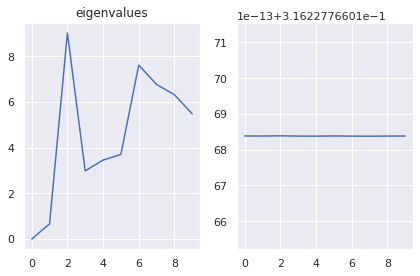

In [36]:
fig = plt.figure()

ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')

i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])

fig.tight_layout()
plt.show()

In [37]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

pokemon = pd.read_csv('./assets/pokemon.csv')

# drop rows containing null values for weight or height
pokemon = pokemon.dropna(axis=0, subset=['weight_kg'])
pokemon = pokemon.dropna(axis=0, subset=['height_m'])

# adjusting index
pokemon = pokemon.reset_index(drop=True)

# number of pokemon clusters
team_size = 6

# make new dataframe with relevant metrics
pokemon_metrics = pokemon[['weight_kg','height_m']]


# Preprocessing the data to make it visualizable   
# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(pokemon_metrics) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
print(X_normalized.head())

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
print(X_principal.head())

          0         1
0 -0.757457 -0.652884
1 -0.945928 -0.324378
2  0.415156  0.909750
3 -0.679594 -0.733589
4 -0.988554 -0.150866
         P1        P2
0 -0.666363 -0.050822
1 -0.516245 -0.398532
2  1.287311 -0.048098
3 -0.684333  0.059871
4 -0.402855 -0.536612


/home/kustex/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


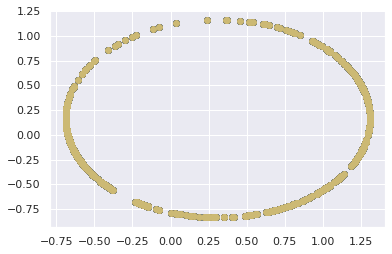

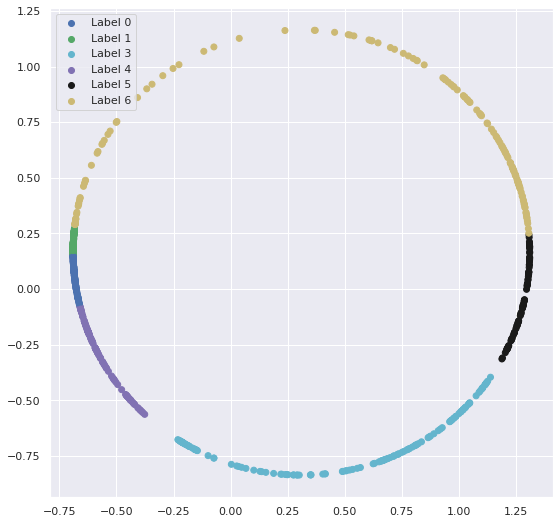

In [38]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = team_size, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_normalized) 

# Building the label to colour mapping 
colours = {} 
colours[0] = 'b'
colours[1] = 'g'
colours[2] = 'c'
colours[3] = 'm'
colours[4] = 'k'
colours[5] = 'y'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels_rbf] 
  
# Plotting the clustered scatter plot 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
c = plt.scatter(X_principal['P1'], X_principal['P2'], color ='c'); 
m = plt.scatter(X_principal['P1'], X_principal['P2'], color ='m'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((b, g, c, m, k, y), ('Label 0', 'Label 1', 'Label 3', 'Label 4', 'Label 5', 'Label 6')) 
plt.show() 


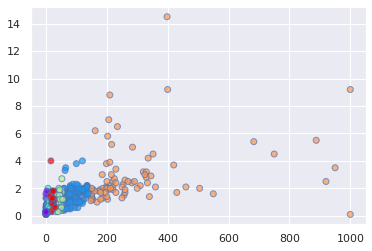

In [41]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=6, affinity='nearest_neighbors',random_state=0)
sc_clustering = sc.fit(pokemon_metrics)

plt.scatter(pokemon_metrics['weight_kg'], pokemon_metrics['height_m'], c=sc_clustering.labels_, cmap='rainbow',
           alpha=0.7, edgecolors='b')
plt.show()